# **Llibreries**
Importem les llibreries que voldrem utilitzar en el projecte.

In [95]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [96]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



# **Dades**
Llegim el csv amb totes les dades disponibles i les mostrem per pantalla

In [97]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("student-mat.csv")

In [98]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Podem veure totes les variables. <br>Podem trobar més informació com quantes columnes i files tenim. (Podemos explicar todas las variables aquí).


In [99]:
data.shape

(395, 33)

Tenim 395 files i 33 columnes. <br>
Més info


In [100]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Ara volem saber si d'aquestes columnes hi alguna amb molt valors NULLS per poder treure-la.

In [101]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No hi ha cap columna amb NULLS per tant ara volem definir quines d'aquestes variables serán útils per al nostre objectiu. (Eliminem les variables que no volem)


In [102]:
data = data.drop(['school', 'famsize', 'Pstatus', 'Fedu', 'Medu', 'Fjob', 'Mjob', 'reason', 'guardian', 'traveltime', 'famsup', 'nursery', 'higher', 'internet', 'goout', 'Dalc', 'Walc', 'health'], axis = 1)

In [103]:
data.shape

(395, 15)

# **Data Transformation**



In [104]:


# for yes / no values:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)

In [105]:
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)


In [106]:


data.nunique()




sex            2
age            8
address        2
studytime      4
failures       4
schoolsup      2
paid           2
activities     2
romantic       2
famrel         5
freetime       5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [107]:
data.head()

,sex,age,address,studytime,failures,schoolsup,paid,activities,romantic,famrel,freetime,absences,G1,G2,G3
0,1,18,U,2,0,1,no,no,no,4,3,6,5,6,6
1,1,17,U,2,0,0,no,no,no,5,3,4,5,5,6
2,1,15,U,2,3,1,yes,no,no,4,3,10,7,8,10
3,1,15,U,3,0,0,yes,yes,yes,3,2,2,15,14,15
4,1,16,U,2,0,0,yes,no,no,4,3,4,6,10,10


# **Taking all data x and y**

In [108]:
x =  data.iloc[:,:-1]
print('This is x: ',x)
y = data.iloc[:,-1]
print('This is y: ',y)

This is x:       sex  age address  studytime  failures  schoolsup paid activities  \
0      1   18       U          2         0          1   no         no   
1      1   17       U          2         0          0   no         no   
2      1   15       U          2         3          1  yes         no   
3      1   15       U          3         0          0  yes        yes   
4      1   16       U          2         0          0  yes         no   
..   ...  ...     ...        ...       ...        ...  ...        ...   
390    0   20       U          2         2          0  yes         no   
391    0   17       U          1         0          0   no         no   
392    0   21       R          1         3          0   no         no   
393    0   18       R          1         0          0   no         no   
394    0   19       U          1         0          0   no         no   

    romantic  famrel  freetime  absences  G1  G2  
0         no       4         3         6   5   6  
1        

In [109]:
def bar_plot(variable):
    var = data[variable]
    var_c = var.value_counts()
    
    plt.figure(figsize= (5,5))
    plt.bar(var_c.index, var_c)
    plt.ylabel('Frequency')
    plt.show()
    print("{}\n{}".format(variable, var_c))

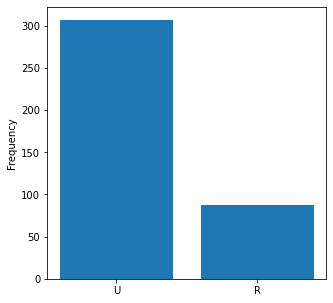

address
U    307
R     88
Name: address, dtype: int64
paid
no     214
yes    181
Name: paid, dtype: int64
activities
yes    201
no     194
Name: activities, dtype: int64
romantic
no     263
yes    132
Name: romantic, dtype: int64


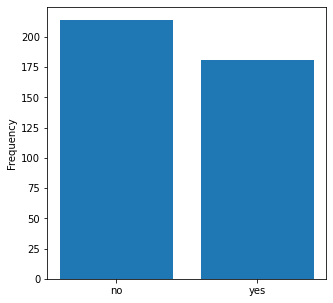

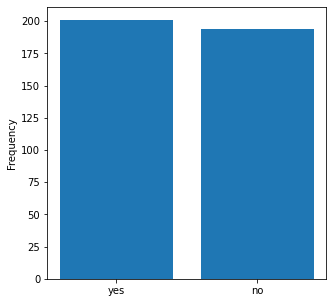

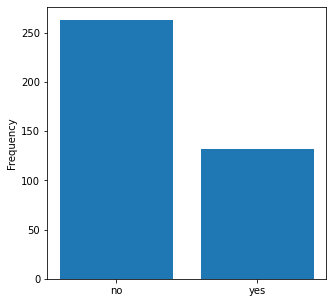

In [110]:


categorical = data.dtypes=='object'
categorical_list = list(categorical[categorical].index)
categorical_list

for i in categorical_list:
    bar_plot(i)



In [111]:
import numpy as np
from sklearn.metrics import mean_squared_error

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print(mse(data['failures'], data['G3']))
print(mean_squared_error(data['G3'], data['failures']))

125.56455696202532
125.56455696202532


In [112]:
from sklearn.linear_model import LinearRegression
def regression(x, y):
    # Creem un objecte de regressió de sklearn

    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr



In [113]:
#transform data
#Urban sera 0
#Rural sera 1
data['address'] = data['address'].replace(['U'],0)
data['address'] = data['address'].replace(['R'],1)
print(data['address'])
#No --> 0
#Yes -->1
data['paid'] = data['paid'].replace(['no'],0)
data['paid'] = data['paid'].replace(['yes'],1)
data['activities'] = data['activities'].replace(['no'],0)
data['activities'] = data['activities'].replace(['yes'],1)
data['romantic'] = data['romantic'].replace(['no'],0)
data['romantic'] = data['romantic'].replace(['yes'],1)

#Normalization
min_max = MinMaxScaler()
dataNormalize = min_max.fit_transform(data)
print(dataNormalize)

0      0
1      0
2      0
3      0
4      0
      ..
390    0
391    0
392    1
393    1
394    0
Name: address, Length: 395, dtype: int64
[[1.         0.42857143 0.         ... 0.125      0.31578947 0.3       ]
 [1.         0.28571429 0.         ... 0.125      0.26315789 0.3       ]
 [1.         0.         0.         ... 0.25       0.42105263 0.5       ]
 ...
 [0.         0.85714286 1.         ... 0.4375     0.42105263 0.35      ]
 [0.         0.42857143 1.         ... 0.5        0.63157895 0.5       ]
 [0.         0.57142857 0.         ... 0.3125     0.47368421 0.45      ]]


In [115]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(dataNormalize)

print(x_t)

[[ 0.94817639  1.02304645 -0.53539233 ... -1.78246688 -1.25479105
  -0.96493392]
 [ 0.94817639  0.23837976 -0.53539233 ... -1.78246688 -1.52097927
  -0.96493392]
 [ 0.94817639 -1.33095364 -0.53539233 ... -1.1791469  -0.72241461
  -0.0907392 ]
 ...
 [-1.05465609  3.37704655  1.86778916 ... -0.27416693 -0.72241461
  -0.74638524]
 [-1.05465609  1.02304645  1.86778916 ...  0.02749306  0.34233827
  -0.0907392 ]
 [-1.05465609  1.80771315 -0.53539233 ... -0.87748691 -0.45622639
  -0.30928788]]
